# Part I - Prosper Loan Data Analysis
## by Mutholib Yusira

## Introduction

This document explores a dataset that contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset spans from the year 2009-2014.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

> **Loading the dataset and describing its properties**

In [2]:
#loading the dataset provided using pandas into a dataframe, loan_data
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#printing first 5 rows of the dataset
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#fetching the dimensions of the dataset
loan_data.shape

(113937, 81)

In [5]:
#printing a concise summary of the dataframe
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Assessing and Cleaning

> **Not all the 81 columns in the dataset would be used for this analysis. Selecting relevant columns, and cleaning of the dataset is essential to create interesting and trustworthy analysis and visualization**

In [6]:
#Selecting relevant columns for this analysis
r_columns = ['ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', \
            'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', \
            'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', \
            'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', \
            'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate',]

In [7]:
#Creating a sub dataset of the 'loan_data', 'df'
df = loan_data[r_columns]
df.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,...,640.0,659.0,5.0,1,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,A,7.0,2,CO,...,680.0,699.0,14.0,13,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,NaN,0,GA,...,480.0,499.0,NaN,0,0.06,Not displayed,True,2083.333333,3001,2007-01-17 00:00:00
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,A,9.0,16,GA,...,800.0,819.0,5.0,7,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,D,4.0,2,MN,...,680.0,699.0,19.0,6,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00


In [8]:
#printing a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   BorrowerState              108422 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  CreditScoreRangeLower      11

In [9]:
#checks for null values in the dataset
df.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
CurrentCreditLines            7604
OpenRevolvingAccounts            0
DebtToIncomeRatio             8554
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
dtype: int64

In [10]:
df.duplicated().sum() #identifies duplicate rows in the dataset

0

In [11]:
#dropping rows with null values
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingNumber              76224 non-null  int64  
 1   ListingCreationDate        76224 non-null  object 
 2   Term                       76224 non-null  int64  
 3   LoanStatus                 76224 non-null  object 
 4   BorrowerAPR                76224 non-null  float64
 5   BorrowerRate               76224 non-null  float64
 6   ProsperRating (Alpha)      76224 non-null  object 
 7   ProsperScore               76224 non-null  float64
 8   ListingCategory (numeric)  76224 non-null  int64  
 9   BorrowerState              76224 non-null  object 
 10  Occupation                 76224 non-null  object 
 11  EmploymentStatus           76224 non-null  object 
 12  IsBorrowerHomeowner        76224 non-null  bool   
 13  CreditScoreRangeLower      76224 non-null  fl

In [13]:
#renaming specific columns that have spaces in them
df.rename(columns={'ProsperRating (Alpha)':'ProsperRating', 'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [14]:
#getting unique values of the series object
df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [15]:
#getting unique values of the series object
df['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [16]:
#getting unique values of the series object
df['ProsperRating'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [17]:
#getting unique values of the series object
df['ProsperScore'].unique()

array([ 7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [18]:
#getting unique values of the series object
df['ListingCategory'].unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  8, 11,  3, 14,  9, 17,  0,
       10,  5, 12], dtype=int64)

In [19]:
#matching the ListingCategory values to their meanings as provided in the context of the dataset
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory'].map(list_dict)

In [20]:
#getting unique values of the series object
df['CreditScoreRangeLower'].unique()

array([680., 800., 740., 700., 820., 640., 660., 720., 760., 780., 600.,
       620., 840., 860., 880.])

In [21]:
#getting unique values of the series object
df['CreditScoreRangeUpper'].unique()

array([699., 819., 759., 719., 839., 659., 679., 739., 779., 799., 619.,
       639., 859., 879., 899.])

In [22]:
#getting unique values of the series object
df['CurrentCreditLines'].unique()

array([14.,  5., 19., 21., 10.,  6., 17.,  2.,  9., 25., 15.,  7., 16.,
       24.,  4.,  0.,  8., 12., 13., 11., 18., 20., 28.,  3., 22., 33.,
       23., 38., 30.,  1., 26., 27., 29., 32., 37., 35., 31., 34., 36.,
       44., 42., 40., 54., 41., 45., 56., 43., 39., 59., 47., 48.])

In [23]:
#getting unique values of the series object
df['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed'], dtype=object)

In [24]:
#converting columns to the write datatypes
df['ListingNumber'] = df['ListingNumber'].astype(str)
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['ProsperScore'] = df['ProsperScore'].astype(int)
df['CreditScoreRangeLower'] = df['CreditScoreRangeLower'].astype(int)
df['CreditScoreRangeUpper'] = df['CreditScoreRangeUpper'].astype(int)
df['CurrentCreditLines'] = df['CurrentCreditLines'].astype(int)
df['IncomeRange'] = df['IncomeRange'].astype('category')
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [25]:
#converting 'ProsperRating' column to ordinal category type
rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
df['ProsperRating'] = df['ProsperRating'].astype(ordered_var)

In [26]:
#Extracting date, month and year information from 'ListingCreationDate' column
df['Date'] = df['ListingCreationDate'].dt.date
df['Month']  = df['ListingCreationDate'].dt.month
df['Year'] = df['ListingCreationDate'].dt.year

In [27]:
#dropping 'ListingCreationDate' column
df.drop(['ListingCreationDate'], axis=1, inplace=True)

In [28]:
#Converting date column dtype
df['Date'] = pd.to_datetime(df['Date'])

In [29]:
#getting unique values of the series object
df['Month'].unique()

array([ 2, 10,  9, 12,  4,  5,  7,  8, 11,  1,  6,  3], dtype=int64)

In [30]:
#changing the numerical values of the 'Month' column to month names
month_dict = {1 : 'January', 2 : 'February', 3: 'March', 
             4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 
             9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}

df['Month'] = df['Month'].map(month_dict)

In [31]:
#creating a new column 'CreditScoreAverage' by getting an average of the credit scores provided
df['CreditScoreAverage'] = (df['CreditScoreRangeUpper'] + df['CreditScoreRangeLower'])/2

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          76224 non-null  object        
 1   Term                   76224 non-null  int64         
 2   LoanStatus             76224 non-null  category      
 3   BorrowerAPR            76224 non-null  float64       
 4   BorrowerRate           76224 non-null  float64       
 5   ProsperRating          76224 non-null  category      
 6   ProsperScore           76224 non-null  int32         
 7   ListingCategory        76224 non-null  object        
 8   BorrowerState          76224 non-null  object        
 9   Occupation             76224 non-null  object        
 10  EmploymentStatus       76224 non-null  object        
 11  IsBorrowerHomeowner    76224 non-null  bool          
 12  CreditScoreRangeLower  76224 non-null  int32         
 13  

In [33]:
#computing and displaying summary statistics of the dataframe
df.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,Year,CreditScoreAverage
count,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000
mean,42.760076,0.223904,0.193624,6.080250,699.271883,718.271883,10.596636,7.398418,0.258041,6003.001652,9294.811018,2012.333543,708.771883
std,11.743734,0.079374,0.074089,2.360641,47.280446,47.280446,5.323957,4.510634,0.320577,5110.685475,6413.578876,1.194943,47.280446
min,12.000000,0.045830,0.040000,1.000000,600.000000,619.000000,0.000000,0.000000,0.000000,0.250000,1000.000000,2009.000000,609.500000
25%,36.000000,0.161570,0.134900,4.000000,660.000000,679.000000,7.000000,4.000000,0.150000,3583.333333,4000.000000,2012.000000,669.500000
50%,36.000000,0.215660,0.184500,6.000000,700.000000,719.000000,10.000000,7.000000,0.220000,5041.666667,8000.000000,2013.000000,709.500000
75%,60.000000,0.287800,0.254900,8.000000,720.000000,739.000000,13.000000,10.000000,0.320000,7250.000000,14603.250000,2013.000000,729.500000
max,60.000000,0.423950,0.360000,11.000000,880.000000,899.000000,59.000000,50.000000,10.010000,483333.333333,35000.000000,2014.000000,889.500000


### What is the structure of your dataset?

> The dataset contains 76,224 loans with 26 features. Most of the variables are numeric, but there are also categorical, string, datetime, and boolean variables present.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what factors affect the interest rates of loans (BorrowerRate). Other features I'm interested in is what is the most common reason for taking out loans(ListingCategory), what factors affect the size of loans available to borrowers(LoanOriginalAmount) and the differences in the loans taken by people of different employment status(EmploymentStatus)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that will have effect on my features of interest and will help support my investigation include: IncomeRange, DebtToIncomeRatio, CreditSCore of the borrower, ProsperRating of the loan. Additional features might be required as the exploration goes on

## Univariate Exploration

### Borrower Rate
The distribution of the interest rate on loans in the dataset

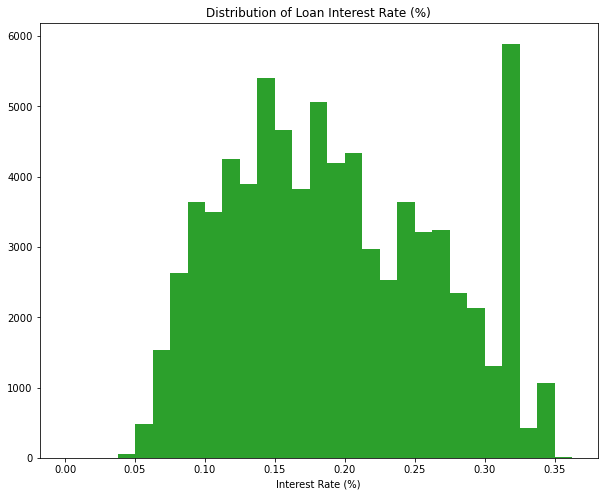

In [34]:
color_base = sb.color_palette()[2]
bins = np.arange(0, df['BorrowerRate'].max()+0.0125, 0.0125)

plt.figure(figsize=(10,8))
plt.hist(data = df, x = 'BorrowerRate', bins=bins, color=color_base)
plt.xlabel('Interest Rate (%)')
plt.title('Distribution of Loan Interest Rate (%)');

**The distribution of the loan interest rate in the dataset follows an almost normal distribution. Asides from the highest peak at 0.0325%, most of the interest rate in the dataset occurs between 0.125% and 0.188%**

### Loan Categories
Distribution of the purpose of the loan in the dataset

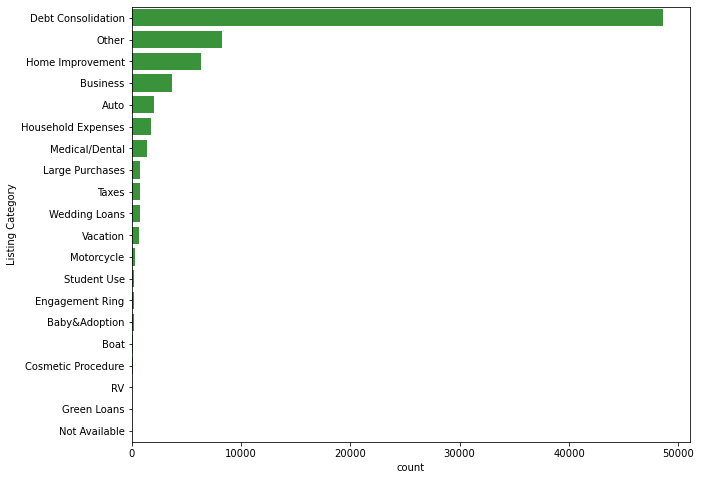

In [35]:
plt.figure(figsize=(10,8))
loan_cat_order = df['ListingCategory'].value_counts().index
listing_counts = df['ListingCategory'].value_counts()
sb.countplot(data = df, y = 'ListingCategory', color = color_base, order=loan_cat_order)
plt.ylabel('Listing Category');

**Debt Consolidation is the category with the highest counts. Other top purposes include Home Improvement/Expenses, Business, Auto, Medical Expenses. This is not surprising, because these are the most reasons why people take out loans.**

### Loan Original Amount
Distribution of the amount of loans taken across the dataset

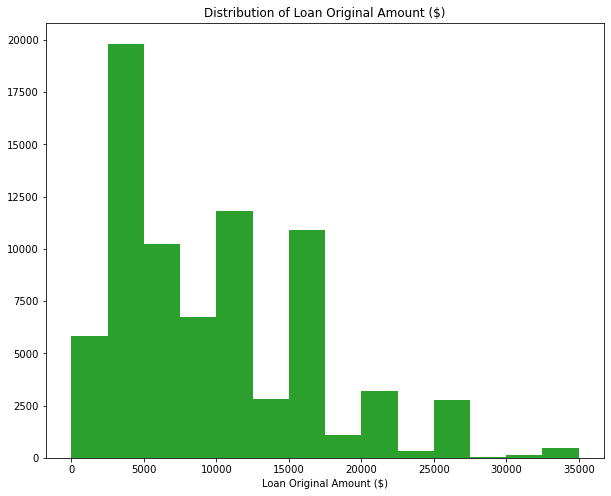

In [36]:
bins = np.arange(0, 35000+2500, 2500)

plt.figure(figsize=(10,8))
plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins, color=color_base)
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

The distribution of the loan original amount plotted on a normal scale shows a right skewed plot. I would scale the x-axis to log type, to get a more normal distribution plot.

In [37]:
#Transforming the summary statistics of the Loan Original Amount column to a scale of log10
np.log10(df['LoanOriginalAmount'].describe())

count    4.882092
mean     3.968241
std      3.807100
min      3.000000
25%      3.602060
50%      3.903090
75%      4.164450
max      4.544068
Name: LoanOriginalAmount, dtype: float64

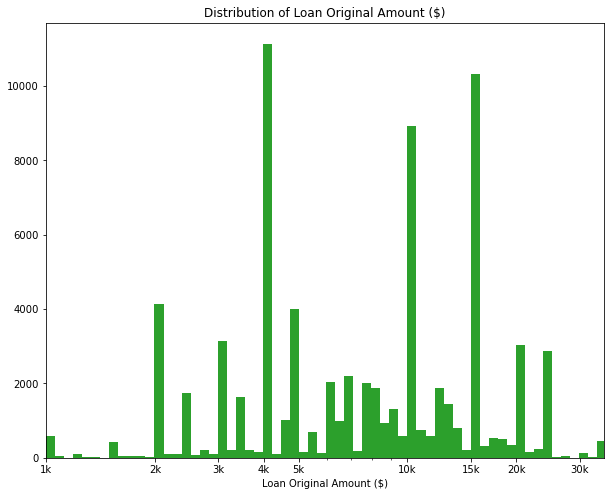

In [38]:
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+0.025, 0.025)
plt.figure(figsize=(10,8))
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins_log, color=color_base)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)')
plt.title('Distribution of Loan Original Amount ($)');

**In the visualiztion above, there are 3 peaks of the Loan Original Amount, at 4k, 10k and 15k. These 3 loan amounts are the most common loan amounts borrowed with 4k being the highest**

### Term of the Loans
Distribution of the length of the loans in the dataset

In [39]:
#Feature engineering of a new column 'Term_yrs' from 'Term' to convert the term in months to years
df['Term_yrs'] = df['Term']/12
df['Term_yrs'] = df['Term_yrs'].astype(int)

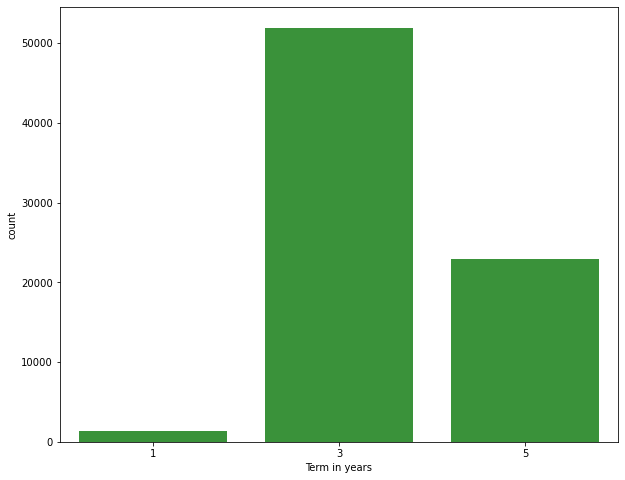

In [40]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='Term_yrs', color=color_base)
plt.xlabel('Term in years');

**The most common duration of loans taken out is 3 years, followed by 5 years. Short term loans(1 year) are not very common in the dataset**

### Employment Status
Distribution of the employment status of the borrowers in the dataset

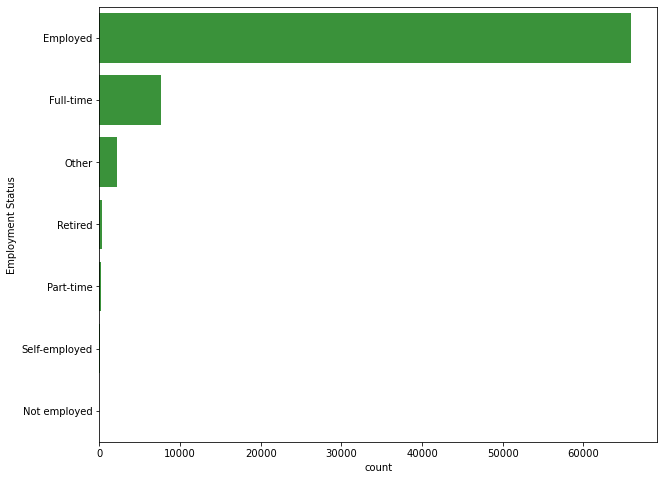

In [41]:
empl_status=df['EmploymentStatus'].value_counts().index
plt.figure(figsize=(10,8))
sb.countplot(data=df, y='EmploymentStatus', order=empl_status, color=color_base)
plt.ylabel('Employment Status');

In [42]:
df[df['EmploymentStatus'] == 'Not employed']

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,...,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Date,Month,Year,CreditScoreAverage,Term_yrs
21386,429702,36,Completed,0.288,0.249,D,8,Auto,MN,Student - Community College,...,Not employed,True,2167.583333,1000,2009-11-04,2009-10-21,October,2009,649.5,3


**Most of the borrowers in the dataset are employed. This might mean that Prosper loans are strictly given out to employed people, as there is only one unemployed borrower in the data**

### Monthly Income Group
Distribution of the income group of the borrowers in the dataset

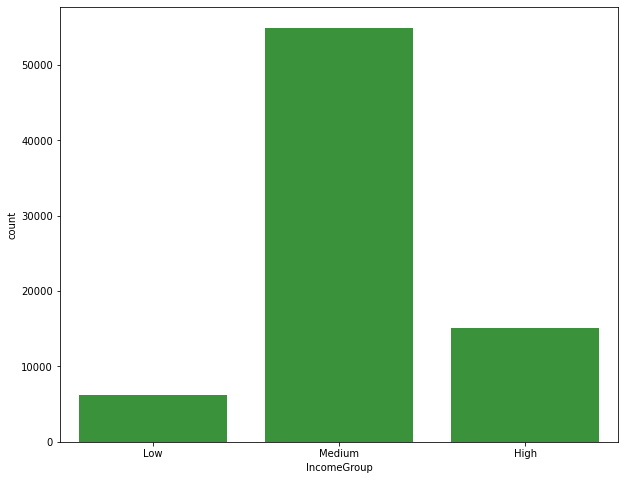

In [43]:
# define a classification function
def classify(income):
    if income["StatedMonthlyIncome"]<2500:
        return 'Low'
    if income["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
df['IncomeGroup'] = df.apply(classify, axis=1)

# convert string to ordinal category type
income_order = ['Low', 'Medium', 'High']
income_ordered_variable = pd.api.types.CategoricalDtype(ordered = True, categories = income_order)
df['IncomeGroup'] = df['IncomeGroup'].astype(income_ordered_variable)

# Plot the new variable
plt.figure(figsize=(10,8))
sb.countplot(data = df, x = 'IncomeGroup', color = color_base);

**The majority of the borrowers fall into the medium income group with an average monthly income between 2500 dollars and 8000 dollars**

### Loan Status
Distribution of the current status of the loans taken in the dataset

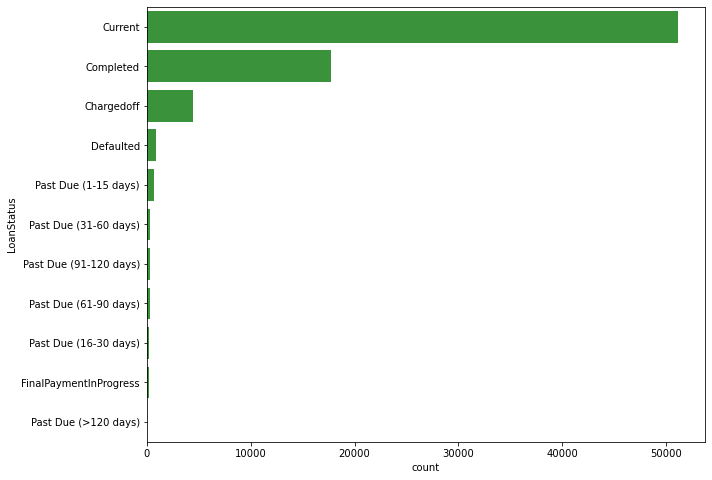

In [44]:
# Order the categorical variable 
status_order=df['LoanStatus'].value_counts().index

# Plot 
plt.figure(figsize=(10,8))
sb.countplot(data=df, y='LoanStatus', order=status_order, color=color_base);

There are a lot of categories distributed under Past Due. I want collapse all these categories into 1.

In [45]:
# Collapsing Past Due loans 
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status_order = pd.api.types.CategoricalDtype(ordered = True, categories = status_dict)

df['LoanStatus'] = df['LoanStatus'].astype(loan_status_order)

Plottng the newly collapsed columns and also printing out the proportion of each category

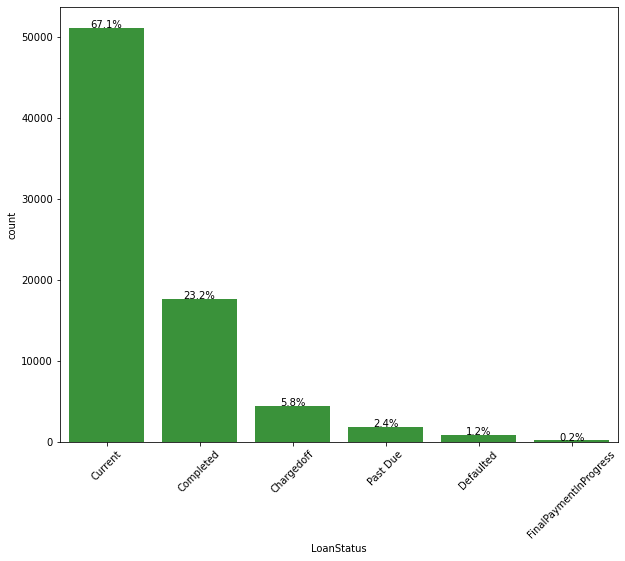

In [46]:
# Printing the proportion above the bars 
n_loans=df['LoanStatus'].value_counts().sum()
status_count=df['LoanStatus'].value_counts()
status_order=status_count.index

plt.figure(figsize=(10,8))
sb.countplot(data=df, x='LoanStatus', color=color_base, order=status_order);

# getting the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# looping through each pair of locations and labels
for loc, label in zip(locs, labels):
    # getting the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)

    # printing the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

**67.1% of the loan payments are current, 23.2% are completed. That puts approximately 80% of the loans in the dataset in good profiles. Only 2.4% of the loans are past due and 1.2% of them defaulted.**

### Debt To Income Ratio
Distribution of the debt to income ratio of the borrower at the time the credit profile was pulled

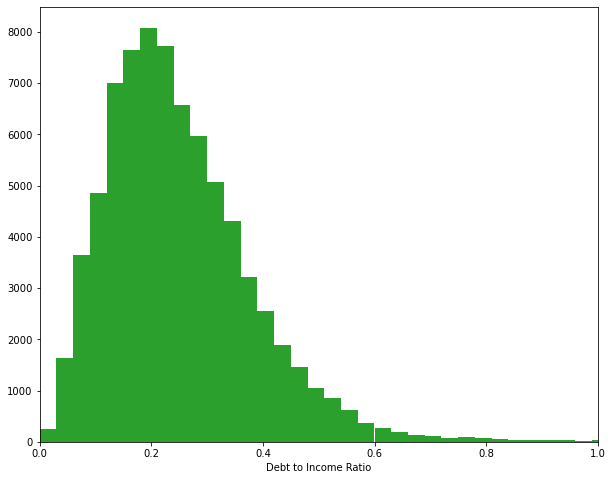

In [47]:
bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.03, 0.03)

plt.figure(figsize=(10,8))
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins, color=color_base)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);

**From the visualization above, most of the borrowers has a debt income ratio of around 0.2. The low debt to income ratio distribution shows that there's a good balance between debt and income. It shows that the borrowers do not have too much debt for the amount of their income.**

### Prosper Rating
Distribution of the Alpha Prosper Rating assigned at the time the listing was created

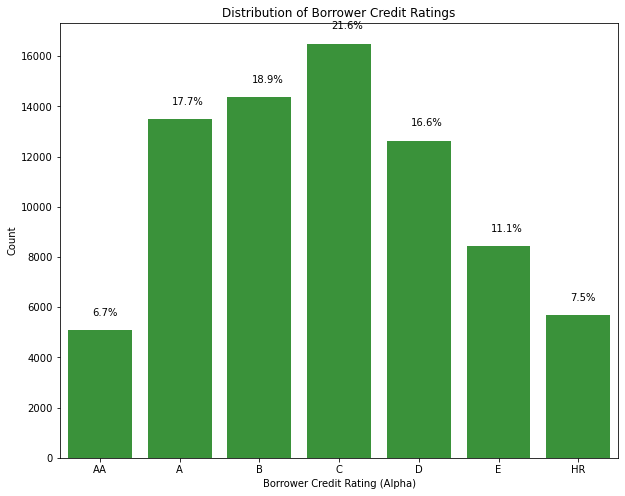

In [48]:
plt.figure(figsize=(10,8))
sb.countplot(data = df, x = 'ProsperRating', color = color_base)
plt.xlabel('Borrower Credit Rating (Alpha)')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');
rating_counts = df['ProsperRating'].value_counts().sort_index()

#Printing the proportion above bars
for i in range(rating_counts.shape[0]):
    count = rating_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

**The highest borrower credit rating is C with a proportion of 21.6%, and the lowest is AA, with a proportion of 6.7%**

### Borrower's Risk Score
Distribution of the custom risk score of borrowers built using historical Prosper data

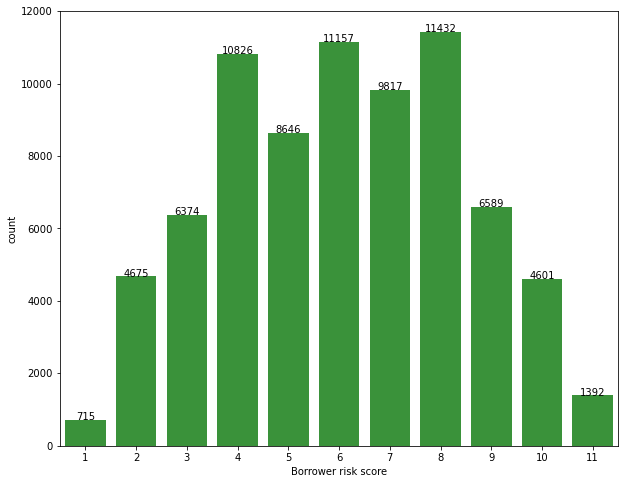

In [49]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='ProsperScore', color=color_base);
plt.xlabel('Borrower risk score');
locs, labels = plt.xticks()
cat_counts = df['ProsperScore'].value_counts()

#Printing the proportion above bars
for loc, label in zip(locs, labels):
    count = cat_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

**The distribution above shows the highest proportion of the borrower's risk score at 4, 6, and 8. There are lower proportions of the lowest and highest borrower risk scores.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan original amount variable took on a smaller range of values, so I looked at the data using a log transform. Under the transformation, the data have three peaks at 4K, 10K, and 15K.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The 'LoanStatus' column had different categories listed as Past Due. I collapsed all said categories into a single Past Due category. I did some cleaning and adjustments on ordering factors of ordinal variables. Finally, I created a new column 'Term_yrs' to show the terms  of the loans in years.

## Bivariate Exploration

### Pairwise Correlations
I want to visualize the strength of relationships between numerical variables in the dataset by plotting pairwise correlations. I will use it to understand which variables are related to each other and the strength of this relationship.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ListingNumber          76224 non-null  object        
 1   Term                   76224 non-null  int64         
 2   LoanStatus             76224 non-null  category      
 3   BorrowerAPR            76224 non-null  float64       
 4   BorrowerRate           76224 non-null  float64       
 5   ProsperRating          76224 non-null  category      
 6   ProsperScore           76224 non-null  int32         
 7   ListingCategory        76224 non-null  object        
 8   BorrowerState          76224 non-null  object        
 9   Occupation             76224 non-null  object        
 10  EmploymentStatus       76224 non-null  object        
 11  IsBorrowerHomeowner    76224 non-null  bool          
 12  CreditScoreRangeLower  76224 non-null  int32         
 13  

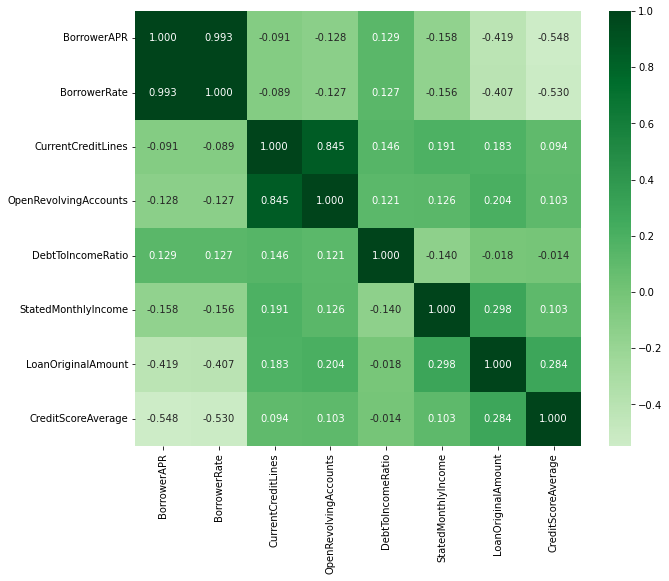

In [51]:
plt.figure(figsize=(10,8))
sb.heatmap(df[['BorrowerAPR', 'BorrowerRate', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'CreditScoreAverage']].corr(), annot = True, fmt = '.3f',
           cmap = "Greens", center=0)
plt.show()

<Figure size 720x576 with 0 Axes>

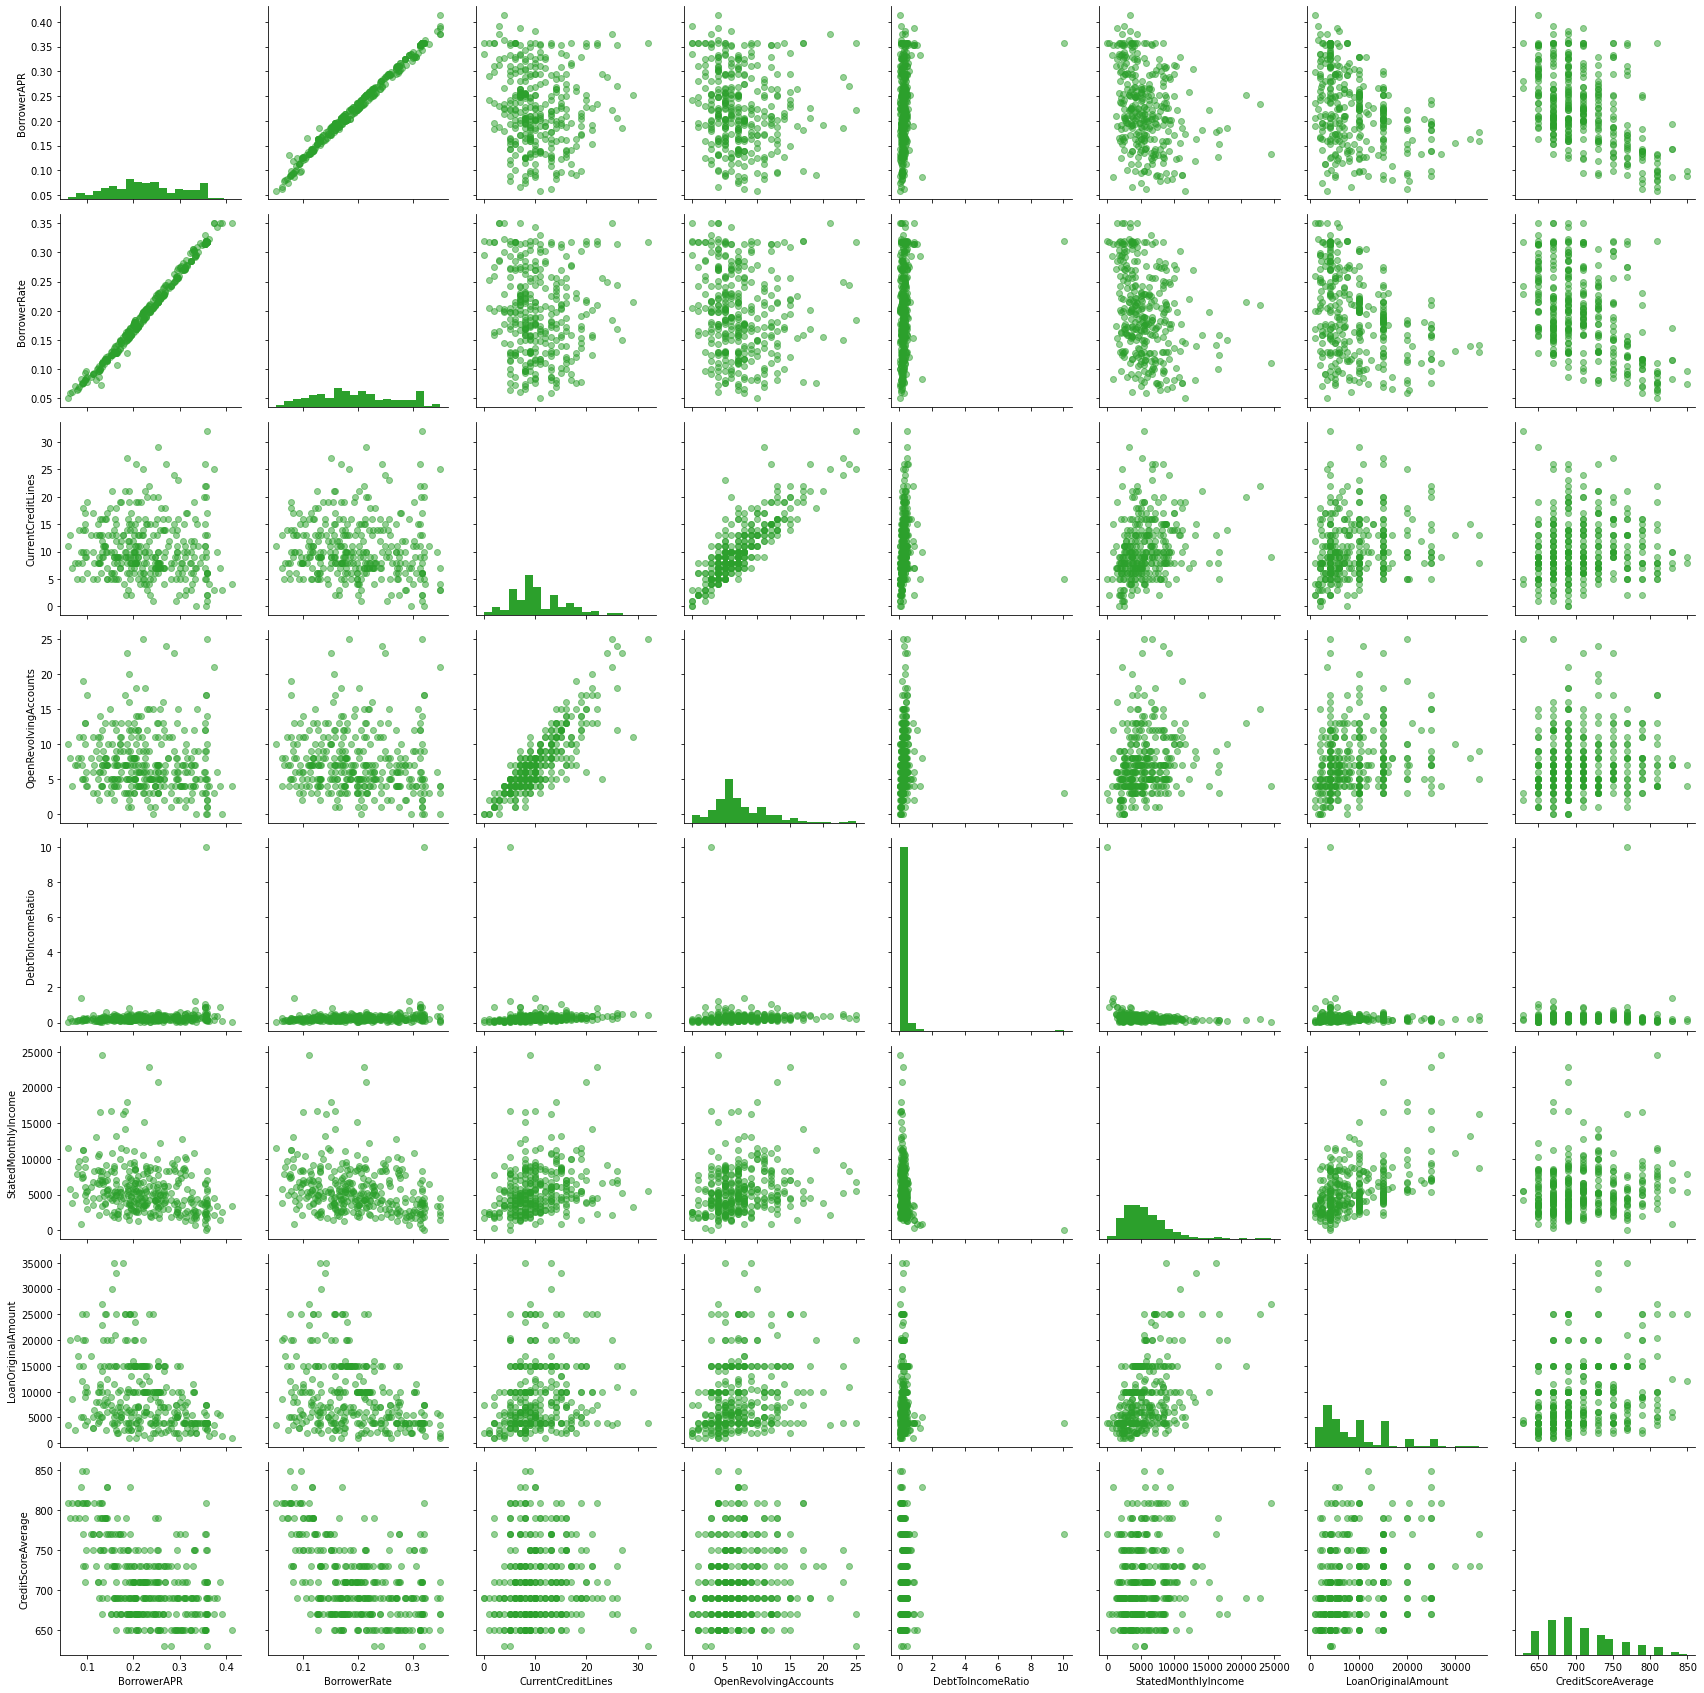

In [52]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.reindex(samples)

# pair grid
plt.figure(figsize=(10,8))
g = sb.PairGrid(data = df_samp, vars = ['BorrowerAPR', 'BorrowerRate', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'CreditScoreAverage'], height = 3)
g = g.map_diag(plt.hist, bins = 20, color=color_base);
g.map_offdiag(plt.scatter, alpha = 1/2, color=color_base);

**From the above visualizations, I was able to deduce that:**
- **My main feature of interest, BorrowerRate has a negative and moderate correlation with Credit Score and Loan Original Amount. That means that the lower the credit score of the borrower, the higher the interest rate on the loan, the same goes with the original loan amount.**
- **BorrowerAPR has the same relationship as BorrowerRate with Credit Score and Loan Original Amount. This is easily predictable because they have very close meanings.**
- **BorrowerRate and BorrowerAPR have a highly positive correlation with each other.**
- **Another relationship that is highly positive is between Current Credit Lines and Open Revolving Accounts.**

**I would like to take a close look at the relationship between Borrower Rate and other categorical variables in the dataset.**

### Borrower Rate and Employment Status
Relationship between the interest rate on loans and the employment status of the borrowers.

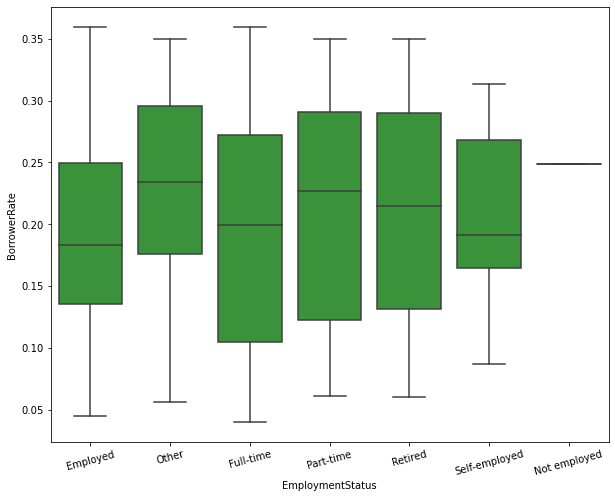

In [53]:
plt.figure(figsize=(10,8))

sb.boxplot(x='EmploymentStatus', y='BorrowerRate', data=df, color=color_base)
plt.xticks(rotation=15);

**From the visualization above, borrowers with full time jobs and with a stable source of income (Employed, Full-time, SElf-employed), had lower interest loans that others. There is only one unemployed borrower in the dataset, and that person has a very high interest rate compared to most of the borrowers.**

### Borrower Rate and Home Owner Status
Relationship between the interest rate on loans and whether the borrowers are home owners or not.

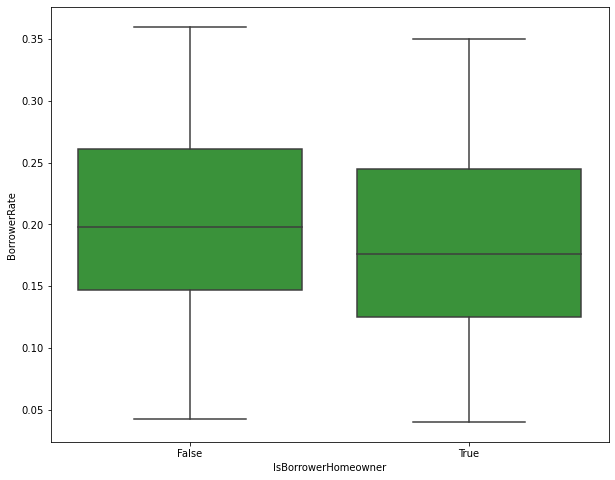

In [54]:
plt.figure(figsize=(10,8))

sb.boxplot(x='IsBorrowerHomeowner', y='BorrowerRate', data=df, color=color_base);

**Borrowers who are homeowners and possibly use those homes as collateral have a lower interest rate than borrowers who do not have homes.**

### Borrower Rate and Income Group
Relationship between the interest rate on loans and the income group of the borrowers.

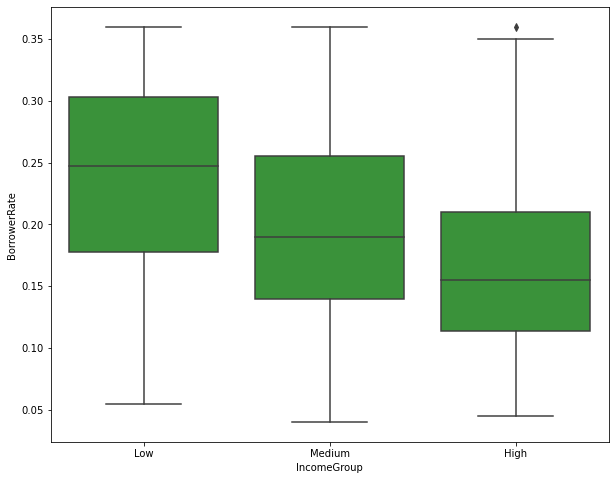

In [55]:
plt.figure(figsize=(10,8))

sb.boxplot(x='IncomeGroup', y='BorrowerRate', data=df, color=color_base);

**There is a negative correlation between the income groups of the borrowers and the interest rate on the loans they take out. The high income group have the lowest loan interest rate, and the low income group have the highest interest rate.**

### Borrower Rate and Prosper Score, Rating
Relationship between the interest rate on loans and the Prosper score, Prosper Rating of the borrowers.

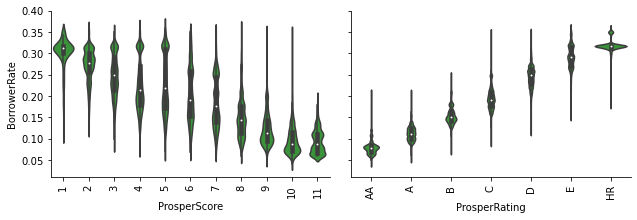

In [56]:
#define violin function
def violin(x, y, **kwargs):
    sb.violinplot(x, y, color = color_base)
    plt.xticks(rotation=90);
    
g = sb.PairGrid(data = df, y_vars = ['BorrowerRate'], x_vars = ['ProsperScore','ProsperRating'],
                height = 3, aspect = 1.5);
g.map(violin);

**From the visualizations above, it is clear that either the Prosper Score or Prosper Rating is a really good determinant of the loan interest rate. The higher the Prosper Score, the lower the interest rate on the loans. Higher Prosper Ratings are also associated with lower loan interest rates.**

### Borrower Rate and Time
Evolution of the loan interest rates over the years.

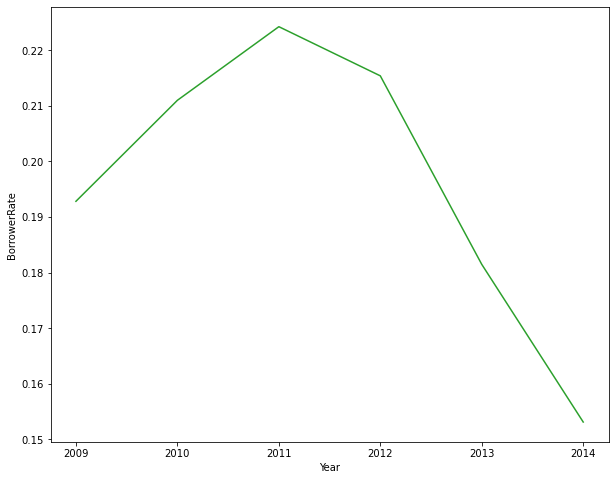

In [57]:
plt.figure(figsize=(10,8))
sb.lineplot(data=df, x='Year', y='BorrowerRate', ci=None, color=color_base);

**There was an increase in the loan interest rate from 2009 - 2011, from then, there was a steady decline till 2014.**

### Loan Category and Loan Status
Does the reason for listing the loan affect the loan payment loans. That is are some categories of loans paid off or defaulted, more than others?

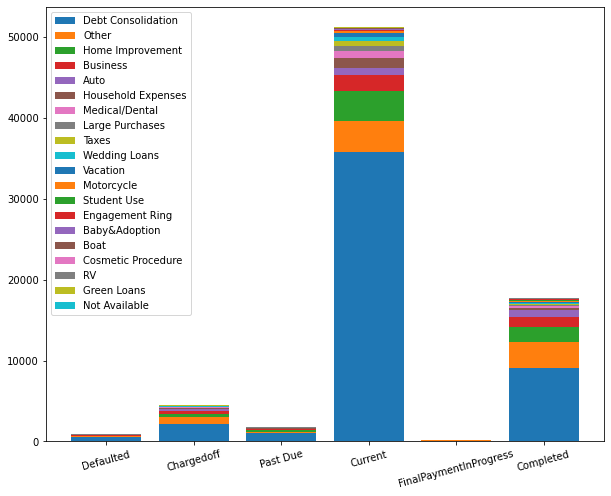

In [58]:
baselines = np.zeros(len(status_dict))
plt.figure(figsize = [10, 8])
# for each second-variable category:
for i in range(len(loan_cat_order)):
# isolate the counts of the first category,
    listing_cat = loan_cat_order[i]
    inner_counts = df[df['ListingCategory'] == listing_cat]['LoanStatus'].value_counts()
# then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(status_dict)), height = inner_counts[status_dict],
            bottom = baselines)
    baselines += inner_counts[status_dict]

plt.xticks(np.arange(len(status_dict)), status_dict, rotation=15)
plt.legend(loan_cat_order);

**Across all categories of loan payment status, debt consolidation has the highest proportion followed by others and then home improvement. The same pattern can be seen in all 6 status. The conclusion is that the reason for listing the loan does not affect the payment status of the loans.**

### Employment Status and Loan Status
Does the employment status of the borrower affect the loan payment status?

In [59]:
employment_order = df['EmploymentStatus'].value_counts().index

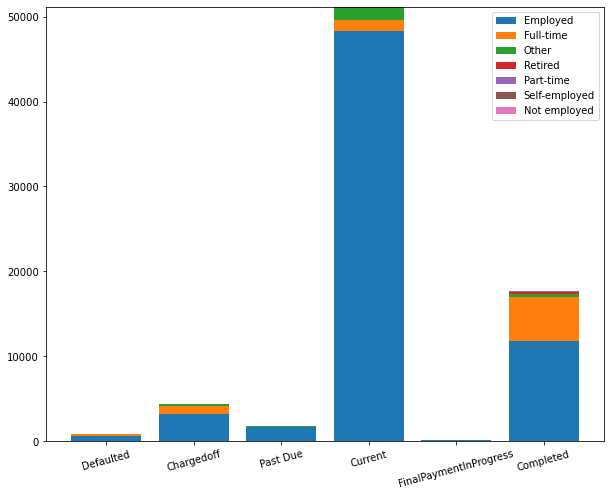

In [60]:
baselines = np.zeros(len(status_dict))
plt.figure(figsize = [10, 8])
# for each second-variable category:
for i in range(len(employment_order)):
# isolate the counts of the first category,
    listing_cate = employment_order[i]
    inner_count = df[df['EmploymentStatus'] == listing_cate]['LoanStatus'].value_counts()
# then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(status_dict)), height = inner_count[status_dict],
            bottom = baselines)
    baselines += inner_count[status_dict]

plt.xticks(np.arange(len(status_dict)), status_dict, rotation=15)
plt.legend(employment_order);

**The pattern of employment status across the loan payments status appears largely the same, with employed borrowers having the highest proportion. However, it can also be seen from the visuaization that most full-time employed borrowers have completed their loan payments.**

### Loan Amount And Employment Status, Income Group
Relationship between the original amount of loan and the employment status, income group of the borrowers.

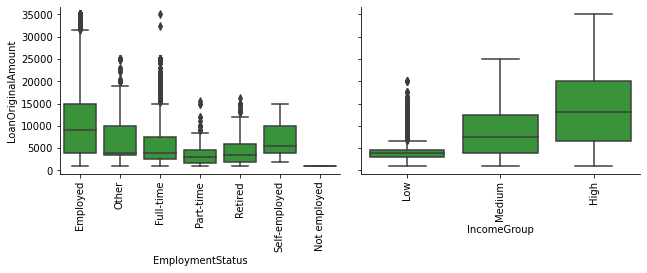

In [61]:
#define violin function
def box(x, y, **kwargs):
    sb.boxplot(x, y, color = color_base)
    plt.xticks(rotation=90);
    
g = sb.PairGrid(data = df, y_vars = ['LoanOriginalAmount'], x_vars = ['EmploymentStatus','IncomeGroup'],
                height = 3, aspect = 1.5);
g.map(box);

**From the visualizations above, people who are steadily employed(Employed, Full-time, Self-employed) and who are in high income groups have access to higher amounts for loans**

### Loan Amount and Home Owner Status
Relationship between loan original amount and whether the borrowers are home owners or not

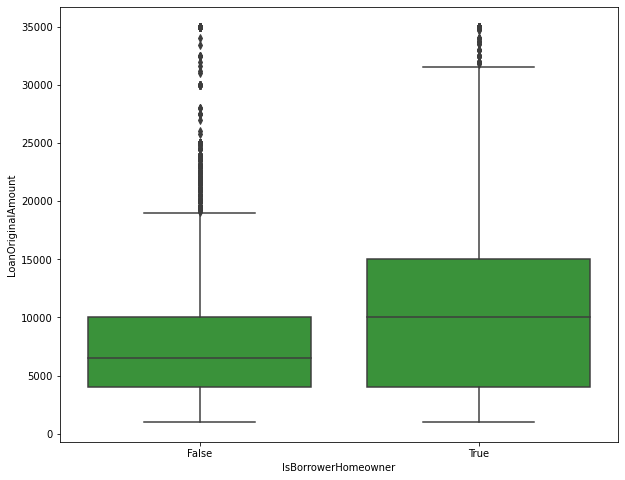

In [62]:
plt.figure(figsize=(10,8))

sb.boxplot(x='IsBorrowerHomeowner', y='LoanOriginalAmount', data=df, color=color_base);

**As expected, borrowers who are home owners have access to higher amounts of loans, that those who do not own homes**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main interest of investigation in this project are the factors affecting the loan interest rate and the loan original amount. From the bivariate exploration of the dataset. I observed the following:
> - The Prosper Score or Prosper Rating is a really good determinant of the loan interest rate. The higher the Prosper Score, the lower the interest rate on the loans. Higher Prosper Ratings are also associated with lower loan interest rates.
> - The loan interest rate is also strongly correlated with Income Group, Employment Status and Home Owner Status. The more financially stable a borrower seems (i.e stably employed, high income group and homeowner), the lower the interest rate on the loans.
> - Taking a look at the loan interest rate over time, there was an increase between 2009 - 2011, and from then, a steady decrease till 2014.
> -  BorrowerRate has a negative and moderate correlation with Credit Score and Loan Original Amount. That means that the lower the credit score of the borrower, the higher the interest rate on the loan. The same goes with the original loan amount, the lower the loan borrowed, the higher the interest rate on the loan.
> - The amount of original loan available to borrowers is also affected by their financial status. The more stable a borrower seems(i.e stably employed, high income group and homeowner), the higher the amount of loan available to that individual.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - I noticed a strong positive correlation between BorrowerRate and BorrowerAPR.
> - There was also a strong positive correlation between OpenRevolvingAccounts and CurrentCreditLines.

## Multivariate Exploration

> Creating plots of three or more variables to investigate the data even
further.

### Borrower Rate and Average Credit Score by Loan Payment Status

In [63]:
#Create a new column which return 1 for good status of payment('Current','Completed','FinalPaymentInProgress') 
# and 0 if there is an issue (defaulted,past due, charged-off payments)

status_good=['Current','Completed','FinalPaymentInProgress']
def cat_Loanstatus(row):
    for i in status_good:
        if i in row:
            return 1
    return 0
df["loanstatus_cat"] = df['LoanStatus'].apply(lambda x: cat_Loanstatus(x))

In [64]:
status = df.groupby('loanstatus_cat').agg({'CreditScoreAverage':'mean','BorrowerRate':'mean'})
status = status.reset_index()
status["loanstatus_cat"].replace({0: "Delinquent", 1: "Good"}, inplace=True)
status = status.sort_values(['CreditScoreAverage'],ascending=False).head(10)
status

,loanstatus_cat,CreditScoreAverage,BorrowerRate
1,Good,710.142713,0.187701
0,Delinquent,695.575561,0.250636


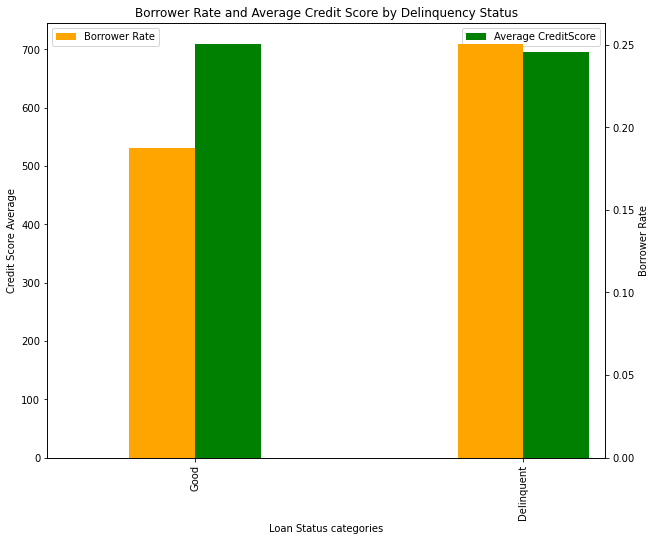

In [65]:
# Create a figure
fig = plt.figure(figsize=(10,8))
# Create matplotlib axes
ax = fig.add_subplot(111)
# Create another axes 
ax2 = ax.twinx()

width = 0.20
CreditScore_average = status.plot(x='loanstatus_cat', y='CreditScoreAverage', kind='bar', color = 'green',
                   width=width,ax=ax, position = 0, label = 'Average CreditScore')
BorrowerRate = status.plot(x='loanstatus_cat', y='BorrowerRate', kind='bar', color = 'orange',
                  width=width,ax=ax2, position = 1,  label = 'Borrower Rate')

ax.set_ylabel('Credit Score Average')
CreditScore_average.legend(loc='upper right')
ax2.set_ylabel('Borrower Rate')
ax2.legend(loc='upper left')
ax.set_xlabel('Loan Status categories')
plt.title('Borrower Rate and Average Credit Score by Delinquency Status');

**For people who are delinquent (defaulted,past due, charged-off payments), banks applies more restricted credit conditions (higher interest rates). Also these people have lower credit scores than people with good status.**

### Borrower Rate For Home Owners and Non-Home Owners Over Time

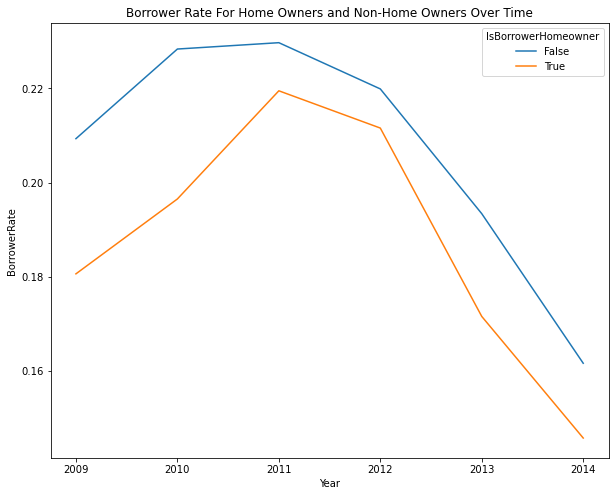

In [66]:
plt.figure(figsize=(10,8))
g=sb.lineplot(data=df, x='Year', y='BorrowerRate', hue='IsBorrowerHomeowner', ci=None)
plt.title('Borrower Rate For Home Owners and Non-Home Owners Over Time');

**The same trend can be seen for the 2 groups of homeowners over time. The interest rate on homeowners has however always been lower than that of those who don't own homes. The gap between the 2 groups slightly decreased since 2011.**

### Borrower Rate by Prosper Rating and Loan Terms

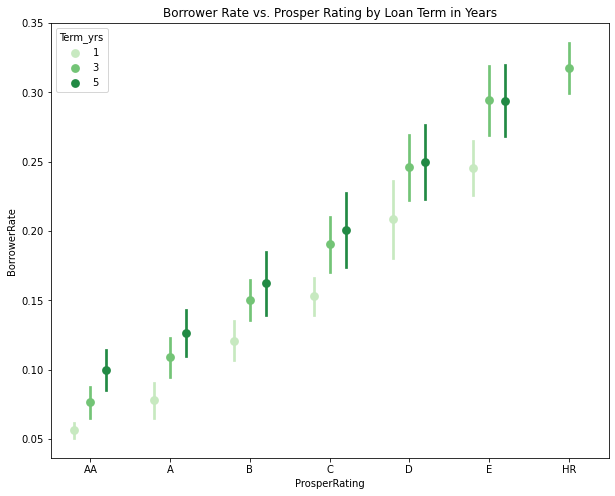

In [67]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df, x = 'ProsperRating', y = 'BorrowerRate', hue = 'Term_yrs',
           palette = 'Greens', linestyles = '',dodge = 0.4, ci='sd')
plt.title('Borrower Rate vs. Prosper Rating by Loan Term in Years');

**From the figure above, it is clear that the lower the loan term, the lower the interest rate on the loan. As observed earlier, the better the Prosper Rating, the lower the interest rate on the loans. I also noted that HR, the least Prosper Rating has only 3 years loan terms.**

### Loan Payment Status by Borrower Rate and Employment Status

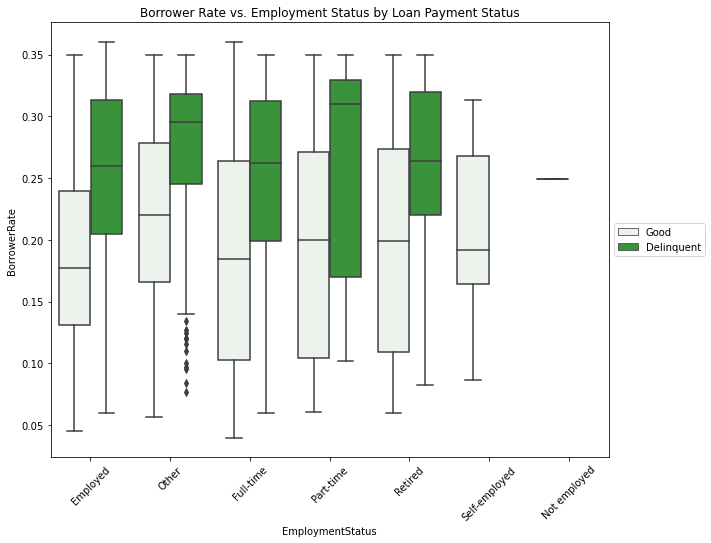

In [68]:
df["loanstatus_cat"].replace({0: "Delinquent", 1: "Good"}, inplace=True)
plt.figure(figsize=[10,8])
sb.boxplot(data=df,x='EmploymentStatus',y='BorrowerRate',hue='loanstatus_cat',dodge=0.3, color=color_base);
plt.xticks(rotation=45);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
plt.title('Borrower Rate vs. Employment Status by Loan Payment Status');

**Loans in good payment status all have a lower interest rate than loans in bad payment status across all categories of employment. Also, as noted earlier, borrowers with more stable employment have access to loans with lower interest rate.**

### Loan Payment Status by Borrower Rate and Prosper Rating

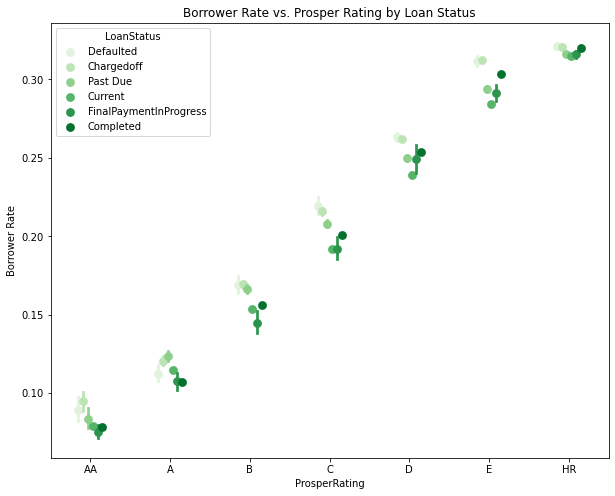

In [69]:
fig = plt.figure(figsize = [10, 8])
ax = sb.pointplot(data = df, x = 'ProsperRating', y = 'BorrowerRate', hue = 'LoanStatus',
           palette = 'Greens', linestyles = '', dodge = 0.3)
plt.title('Borrower Rate vs. Prosper Rating by Loan Status')
plt.ylabel('Borrower Rate')
plt.show();

**For all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans.**

### Loan Amount by Home Owner Status and Income Group

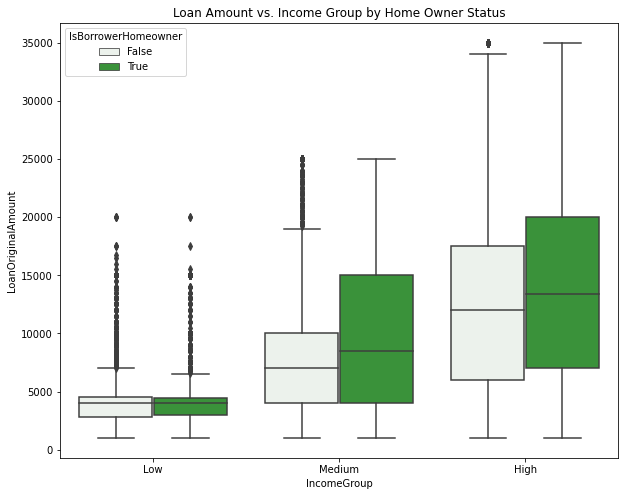

In [70]:
plt.figure(figsize = [10,8])
sb.boxplot(data = df, x = 'IncomeGroup', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', color = color_base)
plt.title('Loan Amount vs. Income Group by Home Owner Status');

**As shown in the previous section, having a collateral and a higher wage help getting higher loan amount.
It is clearly visible that being a home owner is a very important element to get a higher loan amount.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - For people who are delinquent (defaulted,past due, charged-off payments), banks applies more restricted credit conditions (higher interest rates). Also these people have lower credit scores than people with good status.
> - The same trend can be seen for the 2 groups of homeowners over time. The interest rate on homeowners has however always been lower than that of those who don't own homes
> - The lower the loan term, the lower the interest rate on the loan. As observed earlier, the better the Prosper Rating, the lower the interest rate on the loans. I also noted that HR, the least Prosper Rating has only 3 years loan terms.
> - For all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans.
> - Having a collateral and a higher Income Group help getting higher loan amount.
It is clearly visible that being a home owner is a very important element to get a higher loan amount.

### Were there any interesting or surprising interactions between features?

>  I have found that the gap between rates applied for home owners and non home owners has decreased since 2011.

## Conclusion

> The objective of this work was to investigate factors affecting borrower rate and loan amount.

> In the exploration:
> * I found that there was a moderate and negative correlation between interest rate and Loan amount. Also, there is some negative and strong relationships between the categorical/ordinal variables selected and the interest rate. As an example, unemployed people have more restrictive credit condition (higher rate) than the people who have jobs. 
> * The second factor is that borrowers who have collaterals(or homeowners) have lower rates than those who doesn't have any collateral(house).
> * The third determinant is that borrowers with higher monthly salaries tend to get a lower lending interest rate. So, it's a good determinant as well. 
> * Similarly, there is a strong indication that the Prosper score and rating is an excellent determinant factor of borrower's rate. We can conclude that the higher the score , the lower the rate. In other words, borrowers with AA prosper ratings could expect an APR that will likely fall into the 2-15% range, whereas borrowers with bad ratings (HR) could expect their interest rate to go as high as 40%!

> Moreover, i extended my investigation of loan and interest rate against the most explanatory determinants.
> * The multivariate exploration here showed that for people who are delinquent (defaulted,past due, charged-off payments), banks applies more restricted credit conditions (higher interest rates). Also these people have lower credit scores than people with good status.
> * An other point, there is a difference between the rates applied according to the maturities. In other words, the rates applied on 5-year loans are generally higher than the rates applied on other maturities, regardless of the prosper rating (with the exception of the E rating, same rates for 3 and 5 years loans, and the HR rating). This is obvious, when the duration is longer it increases the risk of this operation involving a rise in rates. Of course, as it is always mentioned, the rates are the lowest, for individuals with a good rating. Interestingly, for HR rating, only 3 years loans are observed in this dataset.
> * In parallel, for all Prosper Ratings except for "A",and "AA", Defaulted and charged off loans usually have a higher Borrower APR compared to completed or current loans(good records).
> * Finally, having a collateral and a higher wage help getting higher loan amount. It is clearly visible that being a home owner is a very important element to get a higher loan amount.